Alunos: 
*   Natália Naomi Sumida 19033
*   Maria Paula Barbosa Golçalves de Barros 20731
*   Rafael Scalabrin Dosso 20154

Orientador: 
*   Sérgio Luiz Moral Marques

FoodCare - TCC

Notebook for image recognition (food)

**1. Setup and Load Data**

1.1 Install Dependences and Setup 

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

1.2 Revome dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

1.3 Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/data')

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
# Get another batch from the iterator
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0].shape

In [ ]:
#1 apple
#2 pasta
#3 rice
batch[1]

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**2 Process Data**

2.1 Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
data.as_numpy_iterator().next()

2.2 Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
test_size

In [ ]:
train_size+val_size+test_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**3 Deep Model**

3.1 Build Deep Leaning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

3.2 Train

In [ ]:
logdir="/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/logs"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
hist.history

3.3 Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**4 Evaluate Performance**

4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

2

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

4.2 Test

In [ ]:
import cv2

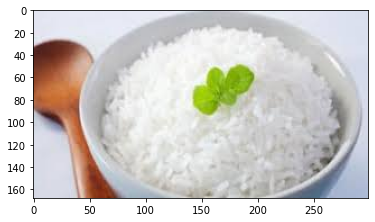

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/rice_teste.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

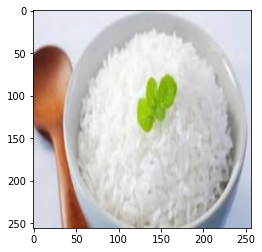

In [ ]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize,0))

1/1 [==============================] - 0s 89ms/step


In [ ]:
yhat

array([[[[227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         ...,
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ]],

        [[227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         ...,
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ]],

        [[227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         [227.     , 229.     , 241.     ],
         ...,
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ],
         [218.     , 224.     , 238.     ]],

        ...,

        [[214.     , 216.     , 228.     ],
         [214.     , 216.     , 228.     ],
         [214.41992, 216.41992, 228.41992],
         ...,


In [ ]:
if yhat > 1.5: 
    print(f'Predicted class is Rice')
elif yhat > 2.5:
    print(f'Predicted class is Pasta')
else:
    print(f'Predicted class is Apple')

**5 Save the Model**

5.1 Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/models', 'foodcare.h5'))

In [ ]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Colab Notebooks/FoodCare_TCC/models', 'foodcare.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [ ]:
if yhat > 1.5: 
    print(f'Predicted class is Rice')
else:
    print(f'Predicted class is Pasta')

ValueError: ignored